#Ouverture CSV

In [1]:
#mettre ici les bibliotheques dont on a besoin
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [2]:
# Augmenter la limite de taille des champs
csv.field_size_limit(10**9)
df = pd.read_csv(
    '2016_Building_Energy_Benchmarking.csv',
    sep=r',',  # ou '\\s+' si "invalid escape sequence"
    engine='python',
    quoting=3,  # Désactive la gestion des guillemets
    on_bad_lines='skip') 
print("Shape :", df.shape)
display(df.head())       # Ignore les lignes mal formées
df.info()
df.describe().T.head(15)

Shape : (1672, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
2,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
3,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7371434.0,47151.81641,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
4,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,...,8.239199e+05,2811215.0,29475.80078,2947580.0,False,NaN,Compliant,NaN,176.14,2.12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1672 non-null   int64  
 1   DataYear                         1672 non-null   int64  
 2   BuildingType                     1672 non-null   object 
 3   PrimaryPropertyType              1672 non-null   object 
 4   PropertyName                     1672 non-null   object 
 5   Address                          1672 non-null   object 
 6   City                             1672 non-null   object 
 7   State                            1672 non-null   object 
 8   ZipCode                          1663 non-null   float64
 9   TaxParcelIdentificationNumber    1672 non-null   object 
 10  CouncilDistrictCode              1672 non-null   int64  
 11  Neighborhood                     1672 non-null   object 
 12  Latitude            

,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,1672.0,21613.404306,10983.436548,1.00000,20310.500000,23259.000000,25886.000000,5.022300e+04
DataYear,1672.0,2016.000000,0.000000,2016.00000,2016.000000,2016.000000,2016.000000,2.016000e+03
ZipCode,1663.0,98118.521347,20.058503,98012.00000,98105.000000,98115.000000,98125.000000,9.827200e+04
CouncilDistrictCode,1672.0,4.200359,2.086960,1.00000,2.000000,4.000000,7.000000,7.000000e+00
Latitude,1672.0,47.624038,0.051143,47.49917,47.596742,47.620230,47.660255,4.773368e+01
Longitude,1672.0,-122.333990,0.029903,-122.41425,-122.354155,-122.330035,-122.316393,-1.222210e+02
YearBuilt,1672.0,1964.486842,31.108252,1900.00000,1941.000000,1968.000000,1989.000000,2.015000e+03
NumberofBuildings,1664.0,1.144231,2.895388,0.00000,1.000000,1.000000,1.000000,1.110000e+02
NumberofFloors,1672.0,3.837321,4.024145,0.00000,2.000000,3.000000,4.000000,9.900000e+01
PropertyGFATotal,1672.0,68427.187201,240012.862679,11285.00000,26092.500000,38407.000000,63445.500000,9.320156e+06


Filtrage sur les batîments non résidentiels

In [3]:
#Filtres sur les bâtiments non résidentiels
# 1. Contrôle visuel pour connaître les différentes catégories
print(df['BuildingType'].value_counts(dropna=False))

# 2. Filtre définitif sur les non résidentiels
keep_types = ['NonResidential', 'Nonresidential COS']
df_nonres = df[df['BuildingType'].isin(keep_types)].copy()

print(f"Bâtiments non résidentiels gardés : {df_nonres.shape[0]}")
print(f"Bâtiments retirés : {df.shape[0] - df_nonres.shape[0]}")

BuildingType
NonResidential          652
Multifamily LR (1-4)    604
Multifamily MR (5-9)    234
SPS-District K-12        96
Nonresidential COS       37
Multifamily HR (10+)     35
Campus                   13
Nonresidential WA         1
Name: count, dtype: int64
Bâtiments non résidentiels gardés : 689
Bâtiments retirés : 983


#Traitement des valeurs abberrantes

In [4]:
# distribution brute
print("=== Outlier ===")
display(df_nonres['Outlier'].value_counts(dropna=False))

print("\n=== ComplianceStatus ===")
display(df_nonres['ComplianceStatus'].value_counts(dropna=False))

=== Outlier ===


Outlier
NaN            679
Low outlier     10
Name: count, dtype: int64


=== ComplianceStatus ===


ComplianceStatus
Compliant                       669
Non-Compliant                    12
Error - Correct Default Data      7
Missing Data                      1
Name: count, dtype: int64

In [5]:
targets = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

# stats descriptives par statut d’Outlier
out_stats = df_nonres.groupby(df_nonres['Outlier'].fillna('No'))[targets].describe().T
comp_stats = df_nonres.groupby(df_nonres['ComplianceStatus'].fillna('Unknown'))[targets].describe().T

display(out_stats)
display(comp_stats)


Outlier                     Low outlier            No
TotalGHGEmissions   count  1.000000e+01  6.770000e+02
                    mean   4.728000e+00  1.392000e+02
                    std    9.044790e+00  4.638835e+02
                    min    1.700000e-01 -8.000000e-01
                    25%    5.500000e-01  1.570000e+01
                    50%    9.250000e-01  3.965000e+01
                    75%    3.187500e+00  1.064500e+02
                    max    2.943000e+01  8.145520e+03
SiteEnergyUse(kBtu) count  1.000000e+01  6.770000e+02
                    mean   1.281118e+06  5.473984e+06
                    std    3.486920e+06  1.435714e+07
                    min    2.410550e+04  0.000000e+00
                    25%    7.948822e+04  9.669074e+05
                    50%    1.330429e+05  1.943899e+06
                    75%    3.104364e+05  4.854430e+06
                    max    1.119592e+07  2.538325e+08

ComplianceStatus              Compliant  Error - Correct Default Data  \
TotalGHGEmissions   count  6.690000e+02                  7.000000e+00   
                    mean   1.407037e+02                  1.538000e+01   
                    std    4.664446e+02                  1.681105e+01   
                    min   -8.000000e-01                  2.340000e+00   
                    25%    1.627000e+01                  5.645000e+00   
                    50%    4.170000e+01                  9.080000e+00   
                    75%    1.078300e+02                  1.709500e+01   
                    max    8.145520e+03                  5.076000e+01   
SiteEnergyUse(kBtu) count  6.690000e+02                  7.000000e+00   
                    mean   5.530685e+06                  8.369001e+05   
                    std    1.443326e+07                  6.306969e+05   
                    min    7.971180e+04                  3.352450e+05   
                    25%    1.000797e+06                  3.753420e+05   
                    50%    1.968655e+06                  5.026677e+05   
                    75%    4.970047e+06                  1.184849e+06   
                    max    2.538325e+08                  1.900006e+06   

ComplianceStatus           Missing Data  Non-Compliant  
TotalGHGEmissions   count           1.0   1.000000e+01  
                    mean            0.0   4.728000e+00  
                    std             NaN   9.044790e+00  
                    min             0.0   1.700000e-01  
                    25%             0.0   5.500000e-01  
                    50%             0.0   9.250000e-01  
                    75%             0.0   3.187500e+00  
                    max             0.0   2.943000e+01  
SiteEnergyUse(kBtu) count           1.0   1.000000e+01  
                    mean            0.0   1.281118e+06  
                    std             NaN   3.486920e+06  
                    min             0.0   2.410550e+04  
                    25%             0.0   7.948822e+04  
                    50%             0.0   1.330429e+05  
                    75%             0.0   3.104364e+05  
                    max             0.0   1.119592e+07

Visualisation des valeurs outliers

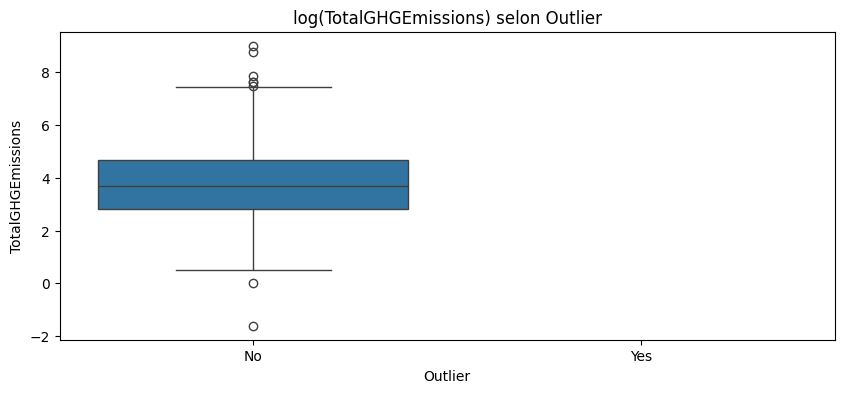

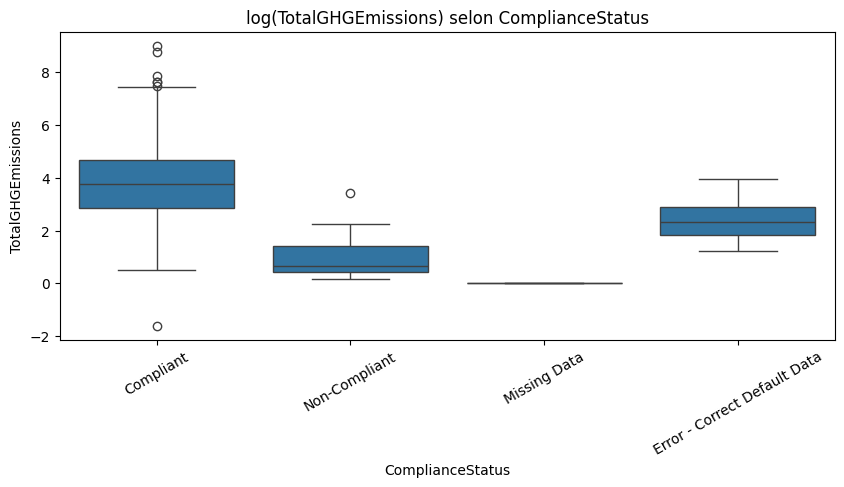

In [6]:

#visualisation de l'effet des outliers sur les émissions 
plt.figure(figsize=(10,4)) #taille de la figure
sns.boxplot(data=df_nonres, x=df_nonres['Outlier'].fillna('No'),
            y=np.log1p(df_nonres['TotalGHGEmissions']),
            order=['No','Yes'])
plt.title('log(TotalGHGEmissions) selon Outlier')
plt.show()
#ici on visualise notre jeu de données sur les bâtiments non résidentiels, on remplace les Nan par 'no' 
# transformation log1p pour être sur une echelle plus stable
# car les valeurs manquantes sont égales à pas marqué comme outlier 

#visualisation de l'impact du statut "compliance"
# même logique, on remplace les Nan par des unknowns pour qu'ils apparaissent
plt.figure(figsize=(10,4))
sns.boxplot(data=df_nonres, x=df_nonres['ComplianceStatus'].fillna('Unknown'),
            y=np.log1p(df_nonres['TotalGHGEmissions']))
plt.title('log(TotalGHGEmissions) selon ComplianceStatus')
plt.xticks(rotation=30)
plt.show()


Filtrage des outliers

In [7]:
# 1. Garde uniquement les bâtiments conformes
mask_comp = df_nonres['ComplianceStatus'] == 'Compliant'

# 2. Retirer les 'Low outlier'
mask_outl = df_nonres['Outlier'].fillna('OK') != 'Low outlier'

df_clean = df_nonres[mask_comp & mask_outl].copy()

print(f"Lignes gardées             : {df_clean.shape[0]}") 
print(f"Lignes retirées (qualité)  : {df_nonres.shape[0] - df_clean.shape[0]}")
df_clean.drop(columns=['Outlier', 'ComplianceStatus'], inplace=True)


Lignes gardées             : 669
Lignes retirées (qualité)  : 20


Analyse et traitement des valeurs manquantes

In [8]:

def missing_zero_table(df):
    """
    Retourne un tableau récapitulatif :
      – N_NaN     : nombre de valeurs manquantes par colonne
      – %_NaN     : pourcentage de NaN
      – N_zeros   : nombre de zéros (pour les colonnes numériques uniquement)
      – %_zeros   : pourcentage de zéros (idem)

    Paramètre
    ----------
    df : pandas.DataFrame
        Le DataFrame à analyser.

    Retour
    ------
    pandas.DataFrame
        Tableau trié par % de NaN décroissant.
    """
    # Valeurs manquantes
    mis_val      = df.isna().sum()
    mis_val_pct  = 100 * mis_val / len(df)

    # Zéros (seulement sur les colonnes numériques, NaN exclus)
    zero_val     = (df.select_dtypes(include=[np.number]) == 0).sum()
    zero_val_pct = 100 * zero_val / len(df)

    # Concaténation
    summary = pd.concat([mis_val, mis_val_pct, zero_val, zero_val_pct],
                        axis=1,
                        keys=['N_NaN', '%_NaN', 'N_zeros', '%_zeros'])

    # Formatage esthétique
    summary = summary.sort_values('%_NaN', ascending=False).round(1)

    return summary


In [9]:
# Inventaire complet
missing_summary = missing_zero_table(df_clean)

# on visualise les 25 colonnes les plus “vides”
display(missing_summary.head(25))

# Isoler celles ayant plus de 30 % de NaN
high_nan = missing_summary[missing_summary['%_NaN'] > 30]
display(high_nan)

,N_NaN,%_NaN,N_zeros,%_zeros
ThirdLargestPropertyUseTypeGFA,669,100.0,0.0,0.0
Comments,669,100.0,0.0,0.0
ThirdLargestPropertyUseType,669,100.0,NaN,NaN
SecondLargestPropertyUseTypeGFA,665,99.4,0.0,0.0
SecondLargestPropertyUseType,665,99.4,NaN,NaN
YearsENERGYSTARCertified,656,98.1,NaN,NaN
ENERGYSTARScore,179,26.8,0.0,0.0
ZipCode,6,0.9,0.0,0.0
LargestPropertyUseType,3,0.4,NaN,NaN
LargestPropertyUseTypeGFA,3,0.4,0.0,0.0


,N_NaN,%_NaN,N_zeros,%_zeros
ThirdLargestPropertyUseTypeGFA,669,100.0,0.0,0.0
Comments,669,100.0,0.0,0.0
ThirdLargestPropertyUseType,669,100.0,NaN,NaN
SecondLargestPropertyUseTypeGFA,665,99.4,0.0,0.0
SecondLargestPropertyUseType,665,99.4,NaN,NaN
YearsENERGYSTARCertified,656,98.1,NaN,NaN


In [10]:
num_cols = df_clean.select_dtypes(include='number').columns

# Tableau récapitulatif uniquement pour ces colonnes
num_summary = missing_zero_table(df_clean[num_cols])
display(num_summary.head(30))       

,N_NaN,%_NaN,N_zeros,%_zeros
Comments,669,100.0,0,0.0
ThirdLargestPropertyUseTypeGFA,669,100.0,0,0.0
SecondLargestPropertyUseTypeGFA,665,99.4,0,0.0
ENERGYSTARScore,179,26.8,0,0.0
ZipCode,6,0.9,0,0.0
LargestPropertyUseTypeGFA,3,0.4,0,0.0
Longitude,0,0.0,0,0.0
Latitude,0,0.0,0,0.0
YearBuilt,0,0.0,0,0.0
NumberofBuildings,0,0.0,21,3.1


In [11]:
df_clean.isnull().mean()*100

OSEBuildingID                        0.000000
DataYear                             0.000000
BuildingType                         0.000000
PrimaryPropertyType                  0.000000
PropertyName                         0.000000
Address                              0.000000
City                                 0.000000
State                                0.000000
ZipCode                              0.896861
TaxParcelIdentificationNumber        0.000000
CouncilDistrictCode                  0.000000
Neighborhood                         0.000000
Latitude                             0.000000
Longitude                            0.000000
YearBuilt                            0.000000
NumberofBuildings                    0.000000
NumberofFloors                       0.000000
PropertyGFATotal                     0.000000
PropertyGFAParking                   0.000000
PropertyGFABuilding(s)               0.000000
ListOfAllPropertyUseTypes            0.000000
LargestPropertyUseType            

In [12]:
#stratégie de nettoyage
#pour les lignes à plus de 95% de NaN, on les retire 
cols_to_drop = [
    'Comments',
    'ThirdLargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA'
]

# errors='ignore' évite toute erreur si l'une d'elles a déjà disparu
df_work = df_clean.drop(columns=cols_to_drop, errors='ignore').copy()

print("Shape après drop :", df_work.shape)

# 2) Remplacer les zéros « physiquement impossibles » par NaN
#    on prépare la liste et on la filtre pour ne garder que les colonnes présentes
cols_zero_bad_all = [
    'NumberofFloors',
    'NumberofBuildings',
    'PropertyGFATotal',
    'PropertyGFABuilding(s)'
]

cols_zero_bad = [c for c in cols_zero_bad_all if c in df_work.columns]

df_work[cols_zero_bad] = df_work[cols_zero_bad].replace(0, np.nan)

# 3) Imputer provisoirement les valeurs manquantes
num_cols = df_work.select_dtypes(include='number').columns
cat_cols = df_work.select_dtypes(exclude='number').columns

df_work[num_cols] = df_work[num_cols].fillna(df_work[num_cols].median())
df_work[cat_cols] = df_work[cat_cols].fillna('Unknown')

print("Nb de NaN restants :", df_work.isna().sum().sum()) 
print(df_work.isna().sum().sum())  # doit afficher 0

Shape après drop : (669, 41)
Nb de NaN restants : 0
0


In [13]:
# Valeurs négatives là où c'est impossible
negatives = (df_work[num_cols] < 0).sum().sort_values(ascending=False)
print("Négatifs repérés (top 10) :\n", negatives.head(10))

# Ordres de grandeur
display(df_work[['PropertyGFATotal','TotalGHGEmissions','SiteEnergyUse(kBtu)']].describe())

Négatifs repérés (top 10) :
 Longitude                669
TotalGHGEmissions          1
SourceEUIWN(kBtu/sf)       1
Electricity(kBtu)          1
Electricity(kWh)           1
GHGEmissionsIntensity      1
Latitude                   0
ZipCode                    0
CouncilDistrictCode        0
DataYear                   0
dtype: int64


,PropertyGFATotal,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,6.690000e+02,669.000000,6.690000e+02
mean,7.180374e+04,140.703677,5.530685e+06
std,9.886842e+04,466.444606,1.443326e+07
min,1.128500e+04,-0.800000,7.971180e+04
25%,2.651000e+04,16.270000,1.000797e+06
50%,4.102200e+04,41.700000,1.968655e+06
75%,7.608600e+04,107.830000,4.970047e+06
max,1.172127e+06,8145.520000,2.538325e+08


In [14]:
# 1. Colonnes à corriger (hors Longitude évidemment)
cols_neg_fix = [
    'TotalGHGEmissions',
    'SourceEUIWN(kBtu/sf)',
    'Electricity(kBtu)',
    'Electricity(kWh)',
    'GHGEmissionsIntensity'
]

# 2. Remplacer les valeurs négatives par NaN
for c in cols_neg_fix:
    if c in df_work.columns:
        n_bad = (df_work[c] < 0).sum()
        if n_bad:
            print(f"{n_bad} valeur(s) négative(s) trouvée(s) dans {c} → NaN")
            df_work.loc[df_work[c] < 0, c] = np.nan

# 3. Ré-imputer uniquement les colonnes concernées
df_work[cols_neg_fix] = df_work[cols_neg_fix].fillna(df_work[cols_neg_fix].median())

# 4. Vérification finale
neg_left = (df_work[cols_neg_fix] < 0).sum().sum()
print("Valeurs négatives restantes (hors Longitude) :", neg_left)

1 valeur(s) négative(s) trouvée(s) dans TotalGHGEmissions → NaN
1 valeur(s) négative(s) trouvée(s) dans SourceEUIWN(kBtu/sf) → NaN
1 valeur(s) négative(s) trouvée(s) dans Electricity(kBtu) → NaN
1 valeur(s) négative(s) trouvée(s) dans Electricity(kWh) → NaN
1 valeur(s) négative(s) trouvée(s) dans GHGEmissionsIntensity → NaN
Valeurs négatives restantes (hors Longitude) : 0


Choix 2 cibles cohérentes pour la mission

In [15]:
# Création des cibles transformées en log(1 + x)
df_work['log_TotalGHGEmissions']    = np.log1p(df_work['TotalGHGEmissions'])
df_work['log_SiteEnergyUse_kBtu']   = np.log1p(df_work['SiteEnergyUse(kBtu)'])

# Petit contrôle
print(df_work[['TotalGHGEmissions', 'log_TotalGHGEmissions']].head())
print(df_work[['SiteEnergyUse(kBtu)', 'log_SiteEnergyUse_kBtu']].head())
print("NaN dans log_TotalGHGEmissions :", df_work['log_TotalGHGEmissions'].isna().sum())
print("NaN dans log_SiteEnergyUse_kBtu :", df_work['log_SiteEnergyUse_kBtu'].isna().sum())


   TotalGHGEmissions  log_TotalGHGEmissions
0             249.98               5.525373
1            2089.28               7.645053
2             286.43               5.660979
3             301.81               5.713106
4             176.14               5.176940
   SiteEnergyUse(kBtu)  log_SiteEnergyUse_kBtu
0            7226362.5               15.793246
1           72587024.0               18.100297
2            6794584.0               15.731637
3           12086616.0               16.307609
4            5758795.0               15.566239
NaN dans log_TotalGHGEmissions : 0
NaN dans log_SiteEnergyUse_kBtu : 0


Exploration des relations potentielles entre les cibles par rapport aux variables

,log_TotalGHGEmissions,log_SiteEnergyUse_kBtu
log_TotalGHGEmissions,1.000000,0.851575
TotalGHGEmissions,1.000000,0.851575
GHGEmissionsIntensity,0.860414,0.604284
SiteEnergyUseWN(kBtu),0.854615,0.978803
SiteEnergyUse(kBtu),0.851575,1.000000
log_SiteEnergyUse_kBtu,0.851575,1.000000
NaturalGas(therms),0.782934,0.496519
NaturalGas(kBtu),0.782934,0.496519
SiteEUIWN(kBtu/sf),0.718065,0.764390
SiteEUI(kBtu/sf),0.715375,0.792976


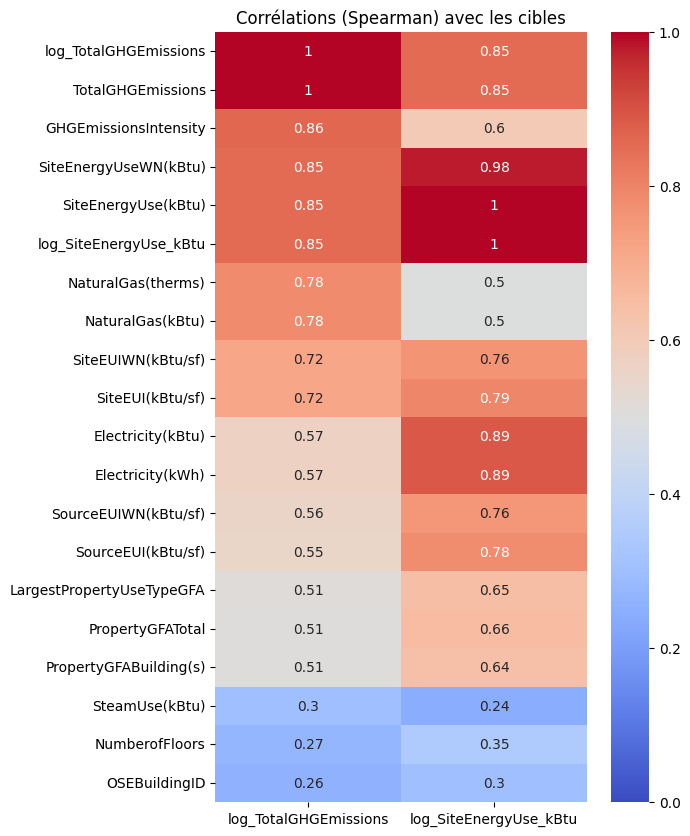

on cherche ici les colonnes supérieures à 0.6


In [16]:
# Sélection des colonnes numériques
num_cols  = df_work.select_dtypes(include='number').columns

# Corrélation de Spearman (plus robuste que Pearson quand les distributions sont asymétriques)
corr_all  = df_work[num_cols].corr(method='spearman')

# Extraire seulement les corrélations avec nos deux cibles
targets   = ['log_TotalGHGEmissions', 'log_SiteEnergyUse_kBtu']
corr_tgt  = corr_all[targets].abs().sort_values(by='log_TotalGHGEmissions', ascending=False)

# ► TOP 10 variables les plus corrélées
display(corr_tgt.head(10))

# Petite heatmap pour se faire une idée visuelle
plt.figure(figsize=(6,10))
sns.heatmap(corr_tgt.head(20), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Corrélations (Spearman) avec les cibles')
plt.show()
print("on cherche ici les colonnes supérieures à 0.6")

PropertyGFATotal est retenue comme feature : relation croissante, disponible dès la conception, pas de fuite d'information.
SiteEUIWN(kBtu/sf) montre une corrélation très forte avec les émissions, mais étant calculée à partir de la consommation réelle
, l'inclure dans un modèle structurel introduirait une fuite de données ; on la garde uniquement pour l'analyse exploratoire, pas pour la prédiction future.


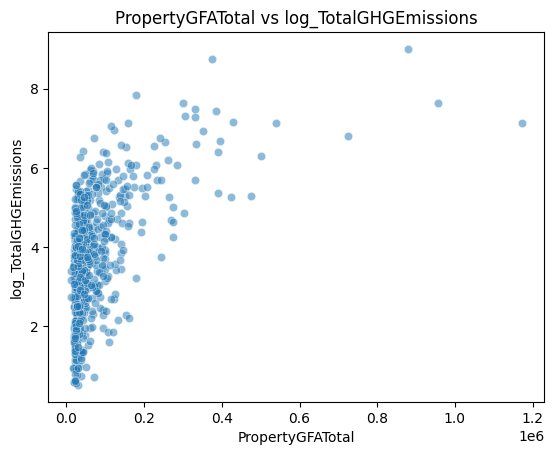

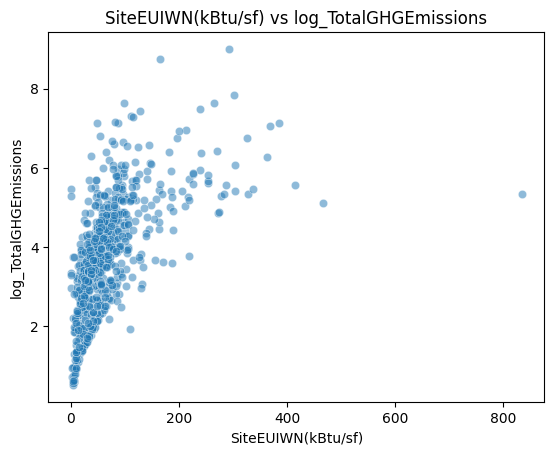

In [17]:
#nuage de points pour les variables les plus corrélées et surtout des données structurelles et d'usage

explanation = (
    "PropertyGFATotal est retenue comme feature : relation croissante, "
    "disponible dès la conception, pas de fuite d'information.\n"
    "SiteEUIWN(kBtu/sf) montre une corrélation très forte avec les émissions, "
    "mais étant calculée à partir de la consommation réelle\n, l'inclure dans un "
    "modèle structurel introduirait une fuite de données ; on la garde uniquement "
    "pour l'analyse exploratoire, pas pour la prédiction future."
)
print(explanation)

top_feats = ['PropertyGFATotal', 'SiteEUIWN(kBtu/sf)' ]

for col in top_feats:
    sns.scatterplot(data=df_work, x=col, y='log_TotalGHGEmissions', alpha=0.5)
    plt.title(f'{col} vs log_TotalGHGEmissions')
    plt.show()

   


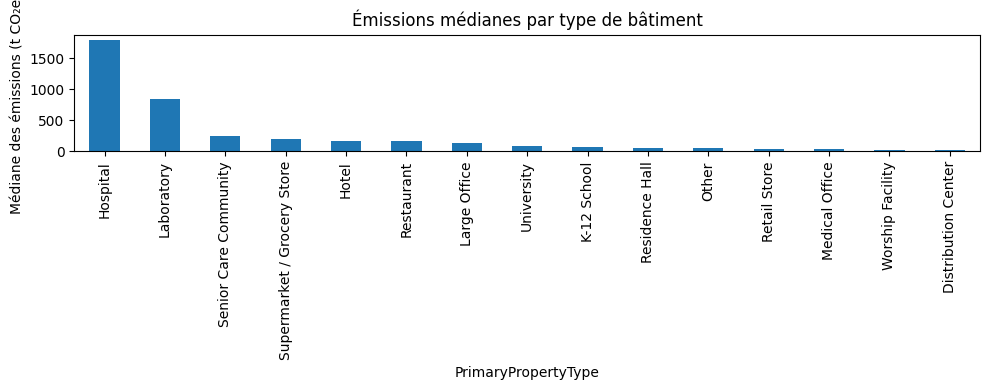

In [18]:
# Moyenne et médiane des émissions de co2 par PrimaryPropertyType - variables catégorielles
pivot = (df_work
         .groupby('PrimaryPropertyType')['TotalGHGEmissions']
         .median()
         .sort_values(ascending=False)
        )

# Barplot
plt.figure(figsize=(10,4))
pivot.head(15).plot(kind='bar')
plt.ylabel('Médiane des émissions (t CO₂e/an)')
plt.title('Émissions médianes par type de bâtiment')
plt.tight_layout()
plt.show()


In [19]:
good_cols = [
    'PropertyGFATotal',
    'PropertyGFABuilding(s)',
    'NumberofFloors',
    'NumberofBuildings',
    'YearBuilt',
    'PrimaryPropertyType',
    'LargestPropertyUseTypeGFA',
    'ZipCode',
    'Neighborhood',
    'Latitude',
    'Longitude',
    'ENERGYSTARScore',          # optionnel pour le moment
    'log_TotalGHGEmissions',     # cible 1
    'log_SiteEnergyUse_kBtu'     # cible 2
]

df_model = df_work[good_cols].copy()
print("Shape df_model :", df_model.shape)

Shape df_model : (669, 14)


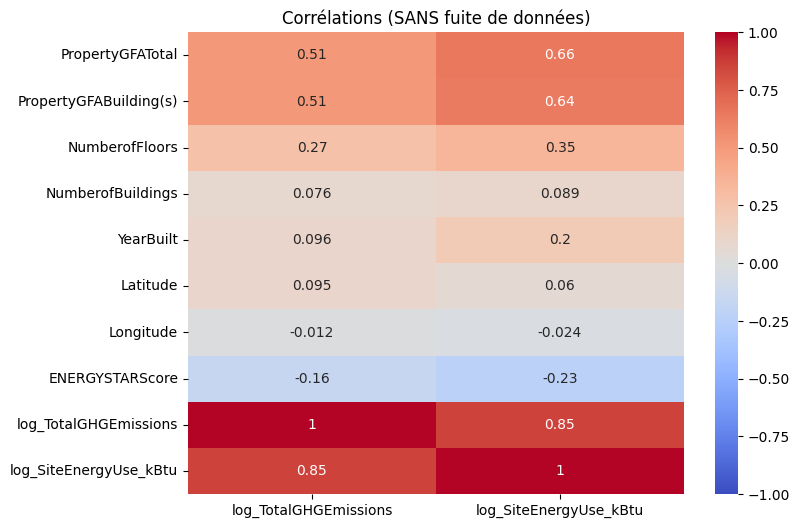

In [20]:
#heatmap pour aider à la décision de créer des features dérivées simple - exemple yearBuilt en buildingAge
num_cols_ok = ['PropertyGFATotal', 'PropertyGFABuilding(s)',
               'NumberofFloors', 'NumberofBuildings',
               'YearBuilt', 'Latitude', 'Longitude', 'ENERGYSTARScore']

corr_ok = df_model[num_cols_ok + ['log_TotalGHGEmissions', 'log_SiteEnergyUse_kBtu']].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_ok[['log_TotalGHGEmissions','log_SiteEnergyUse_kBtu']],
            annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Corrélations (SANS fuite de données)")
plt.show()

In [21]:
df_model.columns

Index(['PropertyGFATotal', 'PropertyGFABuilding(s)', 'NumberofFloors',
       'NumberofBuildings', 'YearBuilt', 'PrimaryPropertyType',
       'LargestPropertyUseTypeGFA', 'ZipCode', 'Neighborhood', 'Latitude',
       'Longitude', 'ENERGYSTARScore', 'log_TotalGHGEmissions',
       'log_SiteEnergyUse_kBtu'],
      dtype='object')

In [22]:
df_model.to_csv("clean_seattle.csv", index=False)